In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

## Dates

In [2]:
# Define path to files
# For MacOS
# PATH = "/Users/derekbanas/Documents/Tutorials/Python for Finance/Stocks/"
# For Windows
PATH = "D:/Python for Finance/Stocks/"

# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = "2021-08-19"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

## Get Stock File Names in a List

In [3]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
tickers.sort()
tickers

['A',
 'AA',
 'AAL',
 'AAME',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAWW',
 'ABBV',
 'ABC',
 'ABCB',
 'ABEO',
 'ABG',
 'ABIO',
 'ABM',
 'ABMD',
 'ABR',
 'ABT',
 'ABTX',
 'AC',
 'ACAD',
 'ACBI',
 'ACC',
 'ACCO',
 'ACER',
 'ACGL',
 'ACHC',
 'ACHV',
 'ACIW',
 'ACLS',
 'ACM',
 'ACMR',
 'ACN',
 'ACNB',
 'ACOR',
 'ACRE',
 'ACRS',
 'ACRX',
 'ACTG',
 'ACU',
 'ACY',
 'ADBE',
 'ADC',
 'ADES',
 'ADI',
 'ADM',
 'ADMA',
 'ADMP',
 'ADMS',
 'ADNT',
 'ADP',
 'ADS',
 'ADSK',
 'ADTN',
 'ADUS',
 'ADVM',
 'ADXS',
 'AE',
 'AEE',
 'AEHR',
 'AEIS',
 'AEL',
 'AEMD',
 'AEO',
 'AEP',
 'AERI',
 'AES',
 'AEY',
 'AFG',
 'AFI',
 'AFL',
 'AGCO',
 'AGEN',
 'AGFS',
 'AGIO',
 'AGLE',
 'AGM',
 'AGNC',
 'AGO',
 'AGR',
 'AGRX',
 'AGTC',
 'AGX',
 'AGYS',
 'AHH',
 'AHT',
 'AIG',
 'AIMC',
 'AIN',
 'AINC',
 'AIR',
 'AIRG',
 'AIRI',
 'AIRT',
 'AIT',
 'AIV',
 'AIZ',
 'AJG',
 'AJRD',
 'AJX',
 'AKAM',
 'AKBA',
 'AKR',
 'AKTS',
 'AL',
 'ALB',
 'ALBO',
 'ALCO',
 'ALDX',
 'ALE',
 'ALEX',
 'ALG',
 'ALGN',
 'ALGT',
 'ALJJ',
 'A

## Function that Returns a Dataframe from a CSV

In [4]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

## Function that Saves Dataframe to CSV

In [5]:
def save_dataframe_to_csv(df, ticker):
    df.to_csv(PATH + ticker + '.csv')

## Return 1st Valid Date in Dataframe

In [6]:
# Receives a start and end date and returns the 1st date in that range
def get_valid_dates(df, sdate, edate):
    
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate) 
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
    
        # Get smallest date that matches
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
    
        # Add leading zeros to date
        # Split string on - and if a number is less than 2 add a zero in front
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
        print(date_leading, " ", date_ending)
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending

## Returns Return on Investment over Time

In [7]:
# Get ROI between 2 dates
def roi_between_dates(df, sdate, edate):
    
    try:
        # Gets the Adj Close price for 1st & last date 
        start_val = df.loc[sdate,'Adj Close'] 
        end_val = df.loc[edate,'Adj Close']
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data Corrupted")
    else:
        return roi

## Get Mean Between Dates

In [8]:
def get_mean_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].mean()

## Get Standard Deviation Between Dates

In [9]:
def get_sd_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].std()

## Get Coefficient of Variation Between Dates

In [10]:
def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_sd_between_dates(df, sdate, edate)
    return sd / mean

## Test Functions

In [11]:
# Get our 1st ticker
tickers[0]
print("Dataframe for Ticker", tickers[0])

# Get a dataframe for that ticker
stock_a = get_df_from_csv(tickers[0])
stock_a

# Get the first and last valid date in the date range
print(get_valid_dates(stock_a, '2020-01-01', '2020-12-31'))
sdate, edate = get_valid_dates(stock_a, '2020-01-01', '2020-12-31')
sdate
edate

print("Adj Close Mean :", get_mean_between_dates(stock_a, sdate, edate))
print("Adj Close Standard Deviation :", get_sd_between_dates(stock_a, sdate, edate))
print("Adj Close Coefficient of Variation :", get_cov_between_dates(stock_a, sdate, edate))

stock_a = stock_a.set_index(['Date'])
stock_a

print("Return on Investment since 2020:", roi_between_dates(stock_a, sdate, edate))

Dataframe for Ticker A
2020-01-02   2020-12-31
('2020-01-02', '2020-12-31')
2020-01-02   2020-12-31
Adj Close Mean : 91.88143609062074
Adj Close Standard Deviation : 13.810425880870476
Adj Close Coefficient of Variation : 0.15030703119669941
Return on Investment since 2020: 0.3875002142531709


## COV & ROI for All Stocks Over Defined Period

In [12]:
def get_cov_ror(tickers, sdate, edate):
    # Define column names for dataframe
    col_names = ["Ticker", "COV", "ROI"]
    
    # Create dataframe with column names
    df = pd.DataFrame(columns = col_names)
    
    for ticker in tickers:
        print("Working on :", ticker)
        s_df = get_df_from_csv(ticker)
    
        sdate2, edate2 = get_valid_dates(s_df, sdate, edate)
    
        cov = get_cov_between_dates(s_df, sdate2, edate2)
    
        # Set date as index
        s_df = s_df.set_index(['Date'])
        roi = roi_between_dates(s_df, sdate2, edate2)

        # Add stock data to new dataframe row
        # len provides the length of the dataframe which is the next open index
        df.loc[len(df.index)] = [ticker, cov, roi]
    
    return df

In [13]:
# Remove CRC GRUB AAN ARNC
market_df = get_cov_ror(tickers, '2017-01-03', '2017-12-31')

Working on : A
2017-01-04   2017-12-29
Working on : AA
2017-01-04   2017-12-29
Working on : AAL
2017-01-04   2017-12-29
Working on : AAME
2017-01-04   2017-12-29
Working on : AAOI
2017-01-04   2017-12-29
Working on : AAON
2017-01-04   2017-12-29
Working on : AAP
2017-01-04   2017-12-29
Working on : AAPL
2017-01-04   2017-12-29
Working on : AAT
2017-01-04   2017-12-29
Working on : AAWW
2017-01-04   2017-12-29
Working on : ABBV
2017-01-04   2017-12-29
Working on : ABC
2017-01-04   2017-12-29
Working on : ABCB
2017-01-04   2017-12-29
Working on : ABEO
2017-01-04   2017-12-29
Working on : ABG
2017-01-04   2017-12-29
Working on : ABIO
2017-01-04   2017-12-29
Working on : ABM
2017-01-04   2017-12-29
Working on : ABMD
2017-01-04   2017-12-29
Working on : ABR
2017-01-04   2017-12-29
Working on : ABT
2017-01-04   2017-12-29
Working on : ABTX
2017-01-04   2017-12-29
Working on : AC
2017-01-04   2017-12-29
Working on : ACAD
2017-01-04   2017-12-29
Working on : ACBI
2017-01-04   2017-12-29
Working

Working on : ARKR
2017-01-04   2017-12-29
Working on : ARL
2017-01-04   2017-12-29
Working on : ARMK
2017-01-04   2017-12-29
Working on : ARNA
2017-01-04   2017-12-29
Working on : AROC
2017-01-04   2017-12-29
Working on : AROW
2017-01-04   2017-12-29
Working on : ARR
2017-01-04   2017-12-29
Working on : ARTNA
2017-01-04   2017-12-29
Working on : ARTW
2017-01-04   2017-12-29
Working on : ARW
2017-01-04   2017-12-29
Working on : ARWR
2017-01-04   2017-12-29
Working on : ASB
2017-01-04   2017-12-29
Working on : ASGN
2017-01-04   2017-12-29
Working on : ASH
2017-01-04   2017-12-29
Working on : ASIX
2017-01-04   2017-12-29
Working on : ASMB
2017-01-04   2017-12-29
Working on : ASPN
2017-01-04   2017-12-29
Working on : ASPS
2017-01-04   2017-12-29
Working on : ASRT
2017-01-04   2017-12-29
Working on : ASRV
2017-01-04   2017-12-29
Working on : ASTC
2017-01-04   2017-12-29
Working on : ASTE
2017-01-04   2017-12-29
Working on : ASUR
2017-01-04   2017-12-29
Working on : ASYS
2017-01-04   2017-12

Working on : BWA
2017-01-04   2017-12-29
Working on : BWEN
2017-01-04   2017-12-29
Working on : BWFG
2017-01-04   2017-12-29
Working on : BWXT
2017-01-04   2017-12-29
Working on : BXC
2017-01-04   2017-12-29
Working on : BXMT
2017-01-04   2017-12-29
Working on : BXP
2017-01-04   2017-12-29
Working on : BXS
2017-01-04   2017-12-29
Working on : BY
2017-06-30   2017-12-29
Working on : BYD
2017-01-04   2017-12-29
Working on : BYFC
2017-01-04   2017-12-29
Working on : BZH
2017-01-04   2017-12-29
Working on : C
2017-01-04   2017-12-29
Working on : CABO
2017-01-04   2017-12-29
Working on : CAC
2017-01-04   2017-12-29
Working on : CACC
2017-01-04   2017-12-29
Working on : CACI
2017-01-04   2017-12-29
Working on : CADE
2017-04-24   2017-12-29
Working on : CAG
2017-01-04   2017-12-29
Working on : CAH
2017-01-04   2017-12-29
Working on : CAI
2017-01-04   2017-12-29
Working on : CAKE
2017-01-04   2017-12-29
Working on : CAL
2017-01-04   2017-12-29
Working on : CALA
2017-01-04   2017-12-29
Working 

Working on : CPF
2017-01-04   2017-12-29
Working on : CPHC
2017-01-04   2017-12-29
Working on : CPIX
2017-01-04   2017-12-29
Working on : CPK
2017-01-04   2017-12-29
Working on : CPRI
2017-01-04   2017-12-29
Working on : CPRT
2017-01-04   2017-12-29
Working on : CPRX
2017-01-04   2017-12-29
Working on : CPS
2017-01-04   2017-12-29
Working on : CPSH
2017-01-04   2017-12-29
Working on : CPSI
2017-01-04   2017-12-29
Working on : CPSS
2017-01-04   2017-12-29
Working on : CPT
2017-01-04   2017-12-29
Working on : CR
2017-01-04   2017-12-29
Working on : CRAI
2017-01-04   2017-12-29
Working on : CRBP
2017-01-04   2017-12-29
Working on : CREE
2017-01-04   2017-12-29
Working on : CRI
2017-01-04   2017-12-29
Working on : CRIS
2017-01-04   2017-12-29
Working on : CRK
2017-01-04   2017-12-29
Working on : CRL
2017-01-04   2017-12-29
Working on : CRM
2017-01-04   2017-12-29
Working on : CRMD
2017-01-04   2017-12-29
Working on : CRMT
2017-01-04   2017-12-29
Working on : CROX
2017-01-04   2017-12-29
Wo

2017-01-04   2017-12-29
Working on : EEX
2017-04-28   2017-12-29
Working on : EFC
2017-01-04   2017-12-29
Working on : EFOI
2017-01-04   2017-12-29
Working on : EFSC
2017-01-04   2017-12-29
Working on : EFX
2017-01-04   2017-12-29
Working on : EGAN
2017-01-04   2017-12-29
Working on : EGBN
2017-01-04   2017-12-29
Working on : EGHT
2017-01-04   2017-12-29
Working on : EGLE
2017-01-04   2017-12-29
Working on : EGP
2017-01-04   2017-12-29
Working on : EGRX
2017-01-04   2017-12-29
Working on : EGY
2017-01-04   2017-12-29
Working on : EHC
2017-01-04   2017-12-29
Working on : EHTH
2017-01-04   2017-12-29
Working on : EIG
2017-01-04   2017-12-29
Working on : EIGR
2017-01-04   2017-12-29
Working on : EIX
2017-01-04   2017-12-29
Working on : EKSO
2017-01-04   2017-12-29
Working on : EL
2017-01-04   2017-12-29
Working on : ELF
2017-01-04   2017-12-29
Working on : ELMD
2017-01-04   2017-12-29
Working on : ELOX
2017-01-04   2017-12-29
Working on : ELS
2017-01-04   2017-12-29
Working on : ELSE
2017

2017-01-04   2017-12-29
Working on : FRGI
2017-01-04   2017-12-29
Working on : FRME
2017-01-04   2017-12-29
Working on : FRPH
2017-01-04   2017-12-29
Working on : FRPT
2017-01-04   2017-12-29
Working on : FRT
2017-01-04   2017-12-29
Working on : FRTA
2017-01-04   2017-12-29
Working on : FSBW
2017-01-04   2017-12-29
Working on : FSFG
2017-01-04   2017-12-29
Working on : FSLR
2017-01-04   2017-12-29
Working on : FSP
2017-01-04   2017-12-29
Working on : FSS
2017-01-04   2017-12-29
Working on : FSTR
2017-01-04   2017-12-29
Working on : FTEK
2017-01-04   2017-12-29
Working on : FTI
2017-01-04   2017-12-29
Working on : FTK
2017-01-04   2017-12-29
Working on : FTNT
2017-01-04   2017-12-29
Working on : FTV
2017-01-04   2017-12-29
Working on : FUL
2017-01-04   2017-12-29
Working on : FULT
2017-01-04   2017-12-29
Working on : FUNC
2017-01-04   2017-12-29
Working on : FUSB
2017-01-04   2017-12-29
Working on : FVE
2017-01-04   2017-12-29
Working on : FWONA
2017-01-04   2017-12-29
Working on : FWON

Working on : HRC
2017-01-04   2017-12-29
Working on : HRI
2017-01-04   2017-12-29
Working on : HRL
2017-01-04   2017-12-29
Working on : HROW
2017-01-04   2017-12-29
Working on : HRTG
2017-01-04   2017-12-29
Working on : HRTX
2017-01-04   2017-12-29
Working on : HSC
2017-01-04   2017-12-29
Working on : HSIC
2017-01-04   2017-12-29
Working on : HSII
2017-01-04   2017-12-29
Working on : HSKA
2017-01-04   2017-12-29
Working on : HSON
2017-01-04   2017-12-29
Working on : HST
2017-01-04   2017-12-29
Working on : HSTM
2017-01-04   2017-12-29
Working on : HSY
2017-01-04   2017-12-29
Working on : HT
2017-01-04   2017-12-29
Working on : HTA
2017-01-04   2017-12-29
Working on : HTBI
2017-01-04   2017-12-29
Working on : HTBK
2017-01-04   2017-12-29
Working on : HTBX
2017-01-04   2017-12-29
Working on : HTGM
2017-01-04   2017-12-29
Working on : HTH
2017-01-04   2017-12-29
Working on : HTLD
2017-01-04   2017-12-29
Working on : HTLF
2017-01-04   2017-12-29
Working on : HUBB
2017-01-04   2017-12-29
Wo

Working on : KIM
2017-01-04   2017-12-29
Working on : KIN
2017-01-04   2017-12-29
Working on : KINS
2017-01-04   2017-12-29
Working on : KIRK
2017-01-04   2017-12-29
Working on : KKR
2017-01-04   2017-12-29
Working on : KLAC
2017-01-04   2017-12-29
Working on : KLIC
2017-01-04   2017-12-29
Working on : KMB
2017-01-04   2017-12-29
Working on : KMI
2017-01-04   2017-12-29
Working on : KMPH
2017-01-04   2017-12-29
Working on : KMPR
2017-01-04   2017-12-29
Working on : KMT
2017-01-04   2017-12-29
Working on : KMX
2017-01-04   2017-12-29
Working on : KN
2017-01-04   2017-12-29
Working on : KNL
2017-01-04   2017-12-29
Working on : KNSL
2017-01-04   2017-12-29
Working on : KNX
2017-01-04   2017-12-29
Working on : KO
2017-01-04   2017-12-29
Working on : KODK
2017-01-04   2017-12-29
Working on : KOP
2017-01-04   2017-12-29
Working on : KOPN
2017-01-04   2017-12-29
Working on : KOS
2017-01-04   2017-12-29
Working on : KPTI
2017-01-04   2017-12-29
Working on : KR
2017-01-04   2017-12-29
Working o

Working on : MHH
2017-01-04   2017-12-29
Working on : MHK
2017-01-04   2017-12-29
Working on : MHLD
2017-01-04   2017-12-29
Working on : MHO
2017-01-04   2017-12-29
Working on : MIC
2017-01-04   2017-12-29
Working on : MICR
2017-01-04   2017-12-29
Working on : MICT
2017-01-04   2017-12-29
Working on : MIDD
2017-01-04   2017-12-29
Working on : MIND
2017-01-04   2017-12-29
Working on : MITK
2017-01-04   2017-12-29
Working on : MITT
2017-01-04   2017-12-29
Working on : MKC
2017-01-04   2017-12-29
Working on : MKL
2017-01-04   2017-12-29
Working on : MKSI
2017-01-04   2017-12-29
Working on : MKTX
2017-01-04   2017-12-29
Working on : MLAB
2017-01-04   2017-12-29
Working on : MLHR
2017-01-04   2017-12-29
Working on : MLI
2017-01-04   2017-12-29
Working on : MLM
2017-01-04   2017-12-29
Working on : MLND
2017-01-04   2017-12-29
Working on : MLP
2017-01-04   2017-12-29
Working on : MLR
2017-01-04   2017-12-29
Working on : MLSS
2017-01-04   2017-12-29
Working on : MLVF
2017-01-04   2017-12-29
Wo

Working on : NUVA
2017-01-04   2017-12-29
Working on : NVAX
2017-01-04   2017-12-29
Working on : NVDA
2017-01-04   2017-12-29
Working on : NVEC
2017-01-04   2017-12-29
Working on : NVEE
2017-01-04   2017-12-29
Working on : NVFY
2017-01-04   2017-12-29
Working on : NVIV
2017-01-04   2017-12-29
Working on : NVR
2017-01-04   2017-12-29
Working on : NVRO
2017-01-04   2017-12-29
Working on : NVTA
2017-01-04   2017-12-29
Working on : NWBI
2017-01-04   2017-12-29
Working on : NWE
2017-01-04   2017-12-29
Working on : NWFL
2017-01-04   2017-12-29
Working on : NWHM
2017-01-04   2017-12-29
Working on : NWL
2017-01-04   2017-12-29
Working on : NWLI
2017-01-04   2017-12-29
Working on : NWN
2017-01-04   2017-12-29
Working on : NWPX
2017-01-04   2017-12-29
Working on : NWS
2017-01-04   2017-12-29
Working on : NWSA
2017-01-04   2017-12-29
Working on : NX
2017-01-04   2017-12-29
Working on : NXGN
2017-01-04   2017-12-29
Working on : NXRT
2017-01-04   2017-12-29
Working on : NXST
2017-01-04   2017-12-29

Working on : PMD
2017-01-04   2017-12-29
Working on : PMT
2017-01-04   2017-12-29
Working on : PMTS
2017-01-04   2017-12-29
Working on : PNBK
2017-01-04   2017-12-29
Working on : PNC
2017-01-04   2017-12-29
Working on : PNFP
2017-01-04   2017-12-29
Working on : PNM
2017-01-04   2017-12-29
Working on : PNR
2017-01-04   2017-12-29
Working on : PNRG
2017-01-04   2017-12-29
Working on : PNW
2017-01-04   2017-12-29
Working on : PODD
2017-01-04   2017-12-29
Working on : POOL
2017-01-04   2017-12-29
Working on : POR
2017-01-04   2017-12-29
Working on : POST
2017-01-04   2017-12-29
Working on : POWI
2017-01-04   2017-12-29
Working on : POWL
2017-01-04   2017-12-29
Working on : PPBI
2017-01-04   2017-12-29
Working on : PPC
2017-01-04   2017-12-29
Working on : PPG
2017-01-04   2017-12-29
Working on : PPIH
2017-01-04   2017-12-29
Working on : PPL
2017-01-04   2017-12-29
Working on : PPSI
2017-01-04   2017-12-29
Working on : PQG
2017-09-29   2017-12-29
Working on : PRA
2017-01-04   2017-12-29
Work

2017-01-04   2017-12-29
Working on : SBAC
2017-01-04   2017-12-29
Working on : SBCF
2017-01-04   2017-12-29
Working on : SBFG
2017-01-04   2017-12-29
Working on : SBGI
2017-01-04   2017-12-29
Working on : SBH
2017-01-04   2017-12-29
Working on : SBNY
2017-01-04   2017-12-29
Working on : SBOW
2017-01-04   2017-12-29
Working on : SBRA
2017-01-04   2017-12-29
Working on : SBSI
2017-01-04   2017-12-29
Working on : SBT
2017-11-16   2017-12-29
Working on : SBUX
2017-01-04   2017-12-29
Working on : SC
2017-01-04   2017-12-29
Working on : SCHL
2017-01-04   2017-12-29
Working on : SCHN
2017-01-04   2017-12-29
Working on : SCHW
2017-01-04   2017-12-29
Working on : SCI
2017-01-04   2017-12-29
Working on : SCL
2017-01-04   2017-12-29
Working on : SCON
2017-01-04   2017-12-29
Working on : SCOR
2017-01-04   2017-12-29
Working on : SCS
2017-01-04   2017-12-29
Working on : SCSC
2017-01-04   2017-12-29
Working on : SCVL
2017-01-04   2017-12-29
Working on : SCWX
2017-01-04   2017-12-29
Working on : SCX


2017-01-04   2017-12-29
Working on : SXC
2017-01-04   2017-12-29
Working on : SXI
2017-01-04   2017-12-29
Working on : SXT
2017-01-04   2017-12-29
Working on : SYBT
2017-01-04   2017-12-29
Working on : SYBX
2017-01-04   2017-12-29
Working on : SYF
2017-01-04   2017-12-29
Working on : SYK
2017-01-04   2017-12-29
Working on : SYKE
2017-01-04   2017-12-29
Working on : SYN
2017-01-04   2017-12-29
Working on : SYNA
2017-01-04   2017-12-29
Working on : SYNH
2017-01-04   2017-12-29
Working on : SYNL
2017-01-04   2017-12-29
Working on : SYPR
2017-01-04   2017-12-29
Working on : SYRS
2017-01-04   2017-12-29
Working on : SYX
2017-01-04   2017-12-29
Working on : SYY
2017-01-04   2017-12-29
Working on : T
2017-01-04   2017-12-29
Working on : TACO
2017-01-04   2017-12-29
Working on : TACT
2017-01-04   2017-12-29
Working on : TAIT
2017-01-04   2017-12-29
Working on : TAP
2017-01-04   2017-12-29
Working on : TAST
2017-01-04   2017-12-29
Working on : TAYD
2017-01-04   2017-12-29
Working on : TBBK
2017

Working on : URBN
2017-01-04   2017-12-29
Working on : URI
2017-01-04   2017-12-29
Working on : USAK
2017-01-04   2017-12-29
Working on : USAP
2017-01-04   2017-12-29
Working on : USB
2017-01-04   2017-12-29
Working on : USCR
2017-01-04   2017-12-29
Working on : USEG
2017-01-04   2017-12-29
Working on : USFD
2017-01-04   2017-12-29
Working on : USIO
2017-01-04   2017-12-29
Working on : USLM
2017-01-04   2017-12-29
Working on : USM
2017-01-04   2017-12-29
Working on : USNA
2017-01-04   2017-12-29
Working on : USPH
2017-01-04   2017-12-29
Working on : UTHR
2017-01-04   2017-12-29
Working on : UTI
2017-01-04   2017-12-29
Working on : UTL
2017-01-04   2017-12-29
Working on : UTMD
2017-01-04   2017-12-29
Working on : UUU
2017-01-04   2017-12-29
Working on : UVE
2017-01-04   2017-12-29
Working on : UVSP
2017-01-04   2017-12-29
Working on : UVV
2017-01-04   2017-12-29
Working on : V
2017-01-04   2017-12-29
Working on : VAC
2017-01-04   2017-12-29
Working on : VALU
2017-01-04   2017-12-29
Work

Working on : YEXT
2017-04-13   2017-12-29
Working on : YORW
2017-01-04   2017-12-29
Working on : YTEN
2017-01-04   2017-12-29
Working on : YUM
2017-01-04   2017-12-29
Working on : Z
2017-01-04   2017-12-29
Working on : ZBH
2017-01-04   2017-12-29
Working on : ZBRA
2017-01-04   2017-12-29
Working on : ZDGE
2017-01-04   2017-12-29
Working on : ZEN
2017-01-04   2017-12-29
Working on : ZEUS
2017-01-04   2017-12-29
Working on : ZG
2017-01-04   2017-12-29
Working on : ZGNX
2017-01-04   2017-12-29
Working on : ZION
2017-01-04   2017-12-29
Working on : ZIOP
2017-01-04   2017-12-29
Working on : ZIXI
2017-01-04   2017-12-29
Working on : ZNGA
2017-01-04   2017-12-29
Working on : ZSAN
2017-01-04   2017-12-29
Working on : ZTS
2017-01-04   2017-12-29
Working on : ZUMZ
2017-01-04   2017-12-29
Working on : ZYNE
2017-01-04   2017-12-29
Working on : ZYXI
2017-01-04   2017-12-29


In [14]:
# Get top 20 stocks ROI
market_df.sort_values(by=['ROI'], ascending=False).head(20)

,Ticker,COV,ROI
2906,ZYXI,0.857302,8.085714
1728,MRNS,0.764778,6.846154
2873,XOMA,0.747840,6.385892
2215,RIOT,1.082547,6.270913
2117,PTE,0.466284,5.990964
163,ANAB,0.608761,4.924706
1643,MDGL,0.755781,4.607208
2357,SINT,1.309814,4.046296
898,ESPR,0.322437,3.740100
2340,SGMO,0.491382,3.685714


## Merge Multiple Stocks in One Dataframe by Column Name

In [15]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        df['Date'] = pd.to_datetime(df['Date'])
        # Use a mask to grab data between defined dates
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

## Create a Correlation Matrix using FAANGS

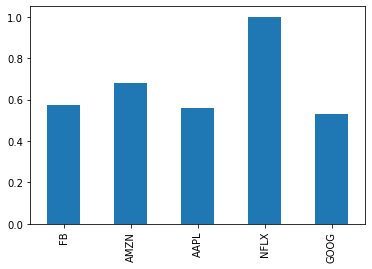

In [16]:
# Correlation tells us how closely 2 stocks returns move together
# Correlation is a standardized value lying between -1 and 1
# When this value is greater that .5 we say that these stocks are strongly correlated
# Of course each stocks price is perfectly correlated with itself

# We focus on the correlation of returns because investors care about returns 

# Merge all stock price data into 1 dataframe
faang_list = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *faang_list)
mult_df

# Generate a Correlation Matrix
mult_df.corr()

# We can look at the correlation between Netflix and the others
mult_df.corr()['NFLX']

# We can plot this in a bar chart
mult_df.corr()['NFLX'].plot(kind='bar')

## Get the Variance of a Stock

In [17]:
# Remember variance is a measure of how spread out a data set is
# Get Netflix variance
mult_df['NFLX'].var()

# Annualize by getting the number of samples and multiply
days = len(mult_df.index) # 253

nflx_a_var = mult_df['NFLX'].var() * 253
nflx_a_var

0.21435236996843518

## Get Covariance of Stocks

Covariance is the measure of the relationship between 2 blocks of data. The covariance of a
stock to itself is the variance of that variable. 

In [18]:
mult_df.cov() * 253

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.211498,0.121090,0.165004,0.122340,0.141870
AMZN,0.121090,0.148918,0.125888,0.121261,0.100904
AAPL,0.165004,0.125888,0.218483,0.120969,0.135044
NFLX,0.122340,0.121261,0.120969,0.214352,0.094118
GOOG,0.141870,0.100904,0.135044,0.094118,0.147431


## Why do We Care About Risk      

Most investors don't handle massive flucuations in stock prices well. What we want to
do at the very least is to make them aware of how dramatically their portfolios 
returns may be. We can then do our best to minimize risk by adding other stocks
that have returns that aren't as closely correlated.

## Calculating a Portfolios Variance

When calculating the variance of a portfolio we must define its weight, or how much of
the portfolio it makes up. If you add up the weight of all stocks you get a value of 1.

$ w_1, w_2 $ = Stock Weights

$ \sigma_1, \sigma_2 $ = Stock Standard Deviations

Portfolio Variance = $ (w_1\sigma_1 + w_2\sigma_2)^2 $

Since $ (a+b)^2 = a^2 + 2ab + b^2 $

Then the Portfolio Variance = $ w_1^2\sigma_1^2 + 2w_1\sigma_1w_2\sigma_2\rho_12 + w_2^2\sigma_2^2 $

In [19]:
# Let's create a portfolio made up of Facebook & Newmont Corporation
port_list = ["FB", "NEM"]
port_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *port_list)
port_df

# Generate a Correlation Matrix to see that they are not correlated
port_df.corr()

# Get prices at the beginning of Jan 2020 to calculate weight of both stocks
price_df = merge_df_by_column_name('Adj Close',  '2020-1-1', '2020-12-31', *["FB","NEM"])
price_df.head()

# I'll buy 1 share of FB at 209.78 & 5 of NEM for 41.74 for a total of 208.70
# Total Value = $418.48
fb_wt = 209.78 / 418.48
nem_wt = 208.70 / 418.48
fb_wt = .5012 # .5012
nem_wt = .4988 # .4987 and we'll change it to .4988 so they equal 1
wts = np.array([fb_wt, nem_wt])

# The portfolio variance is found from matrix multiplication
# We transpose the weights, multiply by the covarience and then the weight to get 
# the covariance of the portfolio
wts.T
port_var = np.dot(wts.T, np.dot(port_df.cov() * 253, wts))
print("Portfolio Var :", port_var)
print("FB Var :", port_df["FB"].var() * 253)
print("NEM Var :", port_df["NEM"].var() * 253)

Portfolio Var : 0.12743411425235876
FB Var : 0.21149771065707557
NEM Var : 0.21334763765730724
